

## Python Packages



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from fastai.tabular import add_datepart

In [2]:
from ML_phase_1 import DataPreprocessing
from linear_regressor import LinearRegressor
from knn_regressor import KNNRegressor
from decision_tree_regressor import DecisionTreeRegression
from lstm import Lstm

### Data Preprocessing(Phase-1)

In [3]:
filterwarnings('ignore')

------------------------------------Relevent Data------------------------------------
         Date  Close    Volume   Open     High     Low
0  03/24/2021  70.08  17089620  71.69  72.4800  70.060
1  03/23/2021  70.91  16238700  71.30  72.6400  70.505
2  03/22/2021  71.96  15039980  72.29  72.6000  71.640
3  03/19/2021  73.01  24079440  73.20  73.5802  71.522
4  03/18/2021  73.84  23857890  74.43  76.1300  73.450
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   Close   2516 non-null   float64
 2   Volume  2516 non-null   int64  
 3   Open    2516 non-null   float64
 4   High    2516 non-null   float64
 5   Low     2516 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.1+ KB
None
             Close        Volume         Open         High          Low
count  2516.000000  2.516000e+03  2516.00

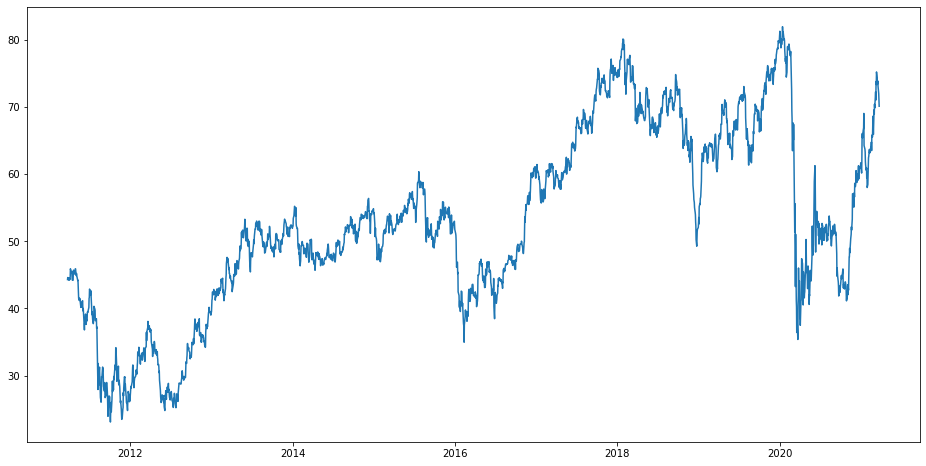

In [4]:
filename = 'C.csv'
df = DataPreprocessing(filename)
df.ProcessData()
train1,test1 = df.CleanData()
df.Visualize()

#Linear Regression using sklearn

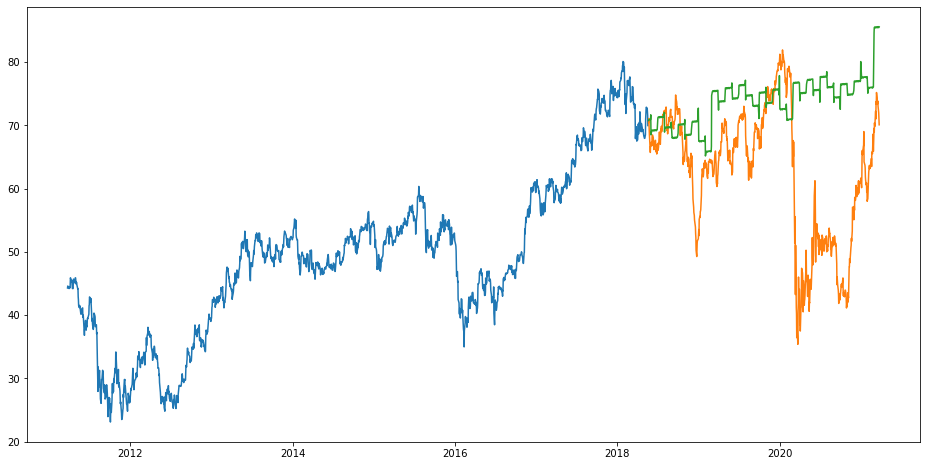

In [5]:
test_A = LinearRegressor(train1,test1)
linear_reg_predA = test_A.predict()
test_A.Visualize(linear_reg_predA)

#LSTM

In [6]:
lstm = Lstm(filename)
db,dataset = lstm.CleanData()
lstm_preds = lstm.predict(db)


1740/1740 - 27s - loss: 0.0020 - 27s/epoch - 16ms/step


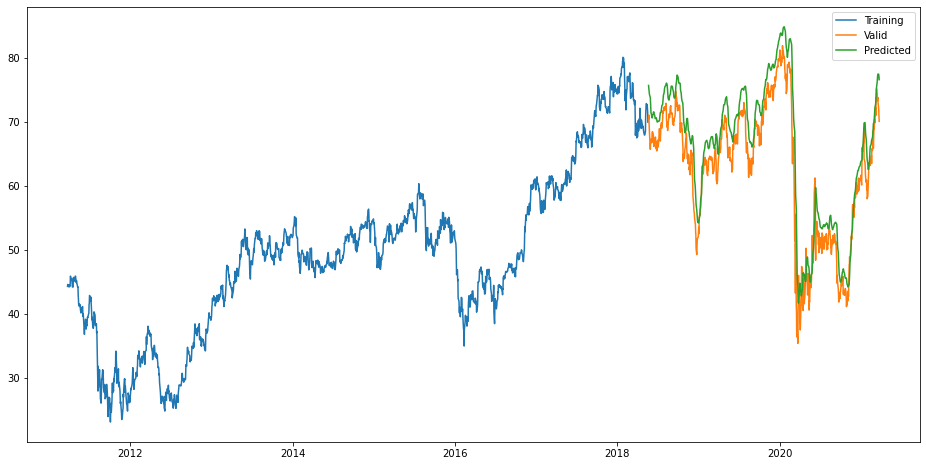

In [7]:
lstm.Visualize(db,lstm_preds)

In [8]:
alpha =0.0000002
theta = np.zeros((14,1))

In [9]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 716 entries, 2018-05-21 to 2021-03-24
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             716 non-null    float64
 1   Year              716 non-null    int64  
 2   Month             716 non-null    int64  
 3   Week              716 non-null    int64  
 4   Day               716 non-null    int64  
 5   Dayofweek         716 non-null    int64  
 6   Dayofyear         716 non-null    int64  
 7   Is_month_end      716 non-null    bool   
 8   Is_month_start    716 non-null    bool   
 9   Is_quarter_end    716 non-null    bool   
 10  Is_quarter_start  716 non-null    bool   
 11  Is_year_end       716 non-null    bool   
 12  Is_year_start     716 non-null    bool   
 13  mon_fri           716 non-null    int64  
 14  Predictions       716 non-null    float64
dtypes: bool(6), float64(2), int64(7)
memory usage: 60.1 KB


#KNN

Root Mean Square:  16.18054345039365
R^2 Score:  -70.95185333457661


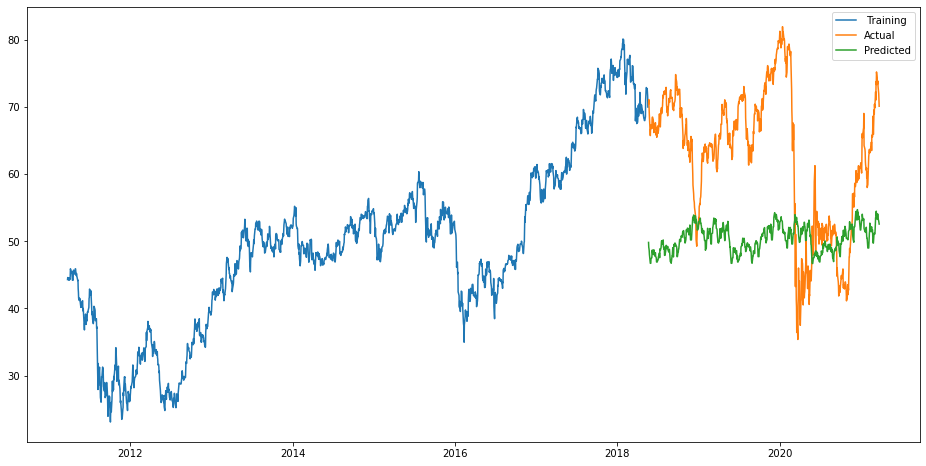

In [10]:
knn   = KNNRegressor()
preds = knn.predict(train1,test1)
knn.Visualize(preds,train1,test1)

#DecisionTree

Root Mean Square:  13.510217393600529
R^2 Score:  -23.114559480111172


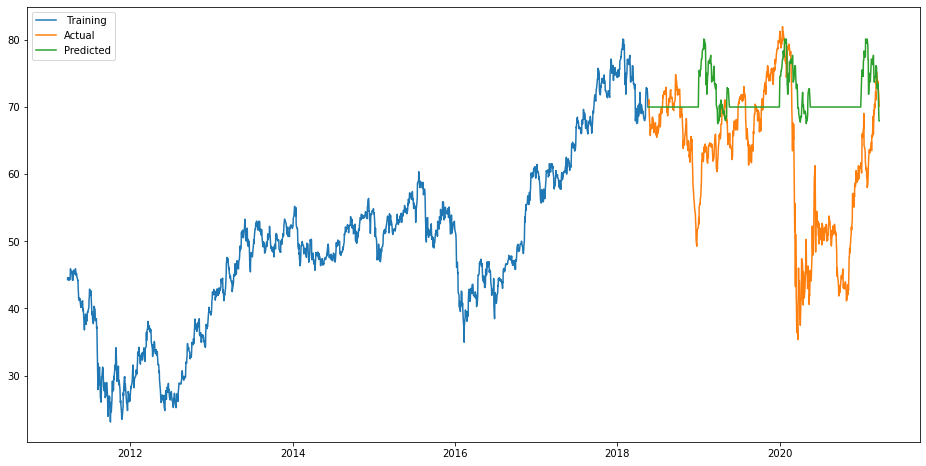

In [11]:
dt    = DecisionTreeRegression()
preds = dt.predict(train1,test1)
dt.Visualize(preds,train1,test1)

#Linear Regression

In [12]:
train = train1
test = test1.drop('Predictions',axis = 1)

In [13]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [14]:
encoder = LabelEncoder()
def convert(dataset,column):
  dataset[column] = encoder.fit_transform(dataset[column])
convert(x_train,'Is_month_end')
convert(x_train,'Is_month_start')
convert(x_train,'Is_quarter_end')
convert(x_train,'Is_quarter_start')
convert(x_train,'Is_year_end')
convert(x_train,'Is_year_start')

In [15]:
alpha =0.0000002
m = len(x_train)
theta = np.zeros((14,1))

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = y_train.reshape((len(y_train),1))
x_train = np.append(np.ones((len(x_train),1)),x_train,axis = 1)

In [17]:
def cost_function(x,y,theta):
  y_pred = np.dot(x,theta)
  error = (y_pred-y)**2
  cost = 1/(2*m)*np.sum(error)
  return cost

In [18]:
def gradient_descent(x,y,theta,alpha,epochs = 1500):
  costs = []

  for i in range(0,epochs):
    y_pred = np.dot(x,theta)
    D = np.dot(x.transpose(),(y_pred-y))/m
    theta -= alpha*D
    costs.append(cost_function(x,y,theta))
  return costs,theta

In [19]:
costs,theta = gradient_descent(x_train,y_train,theta,0.0000002,1500)

In [20]:
y_pred = np.dot(np.append(np.ones((len(x_test),1)),x_test,axis = 1),theta)

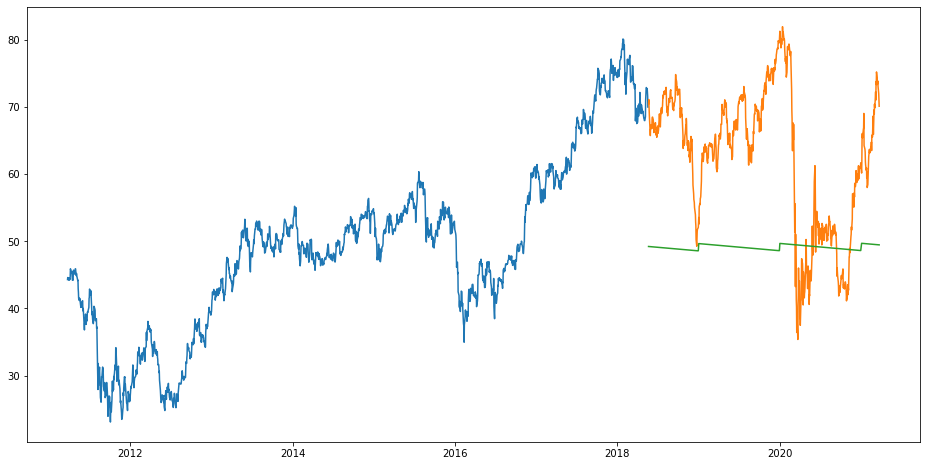

In [21]:
test['Predictions'] = y_pred
plt.figure(figsize= (16,8))
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])
